# Sentiment analysis with Logistic Regression

### Some plotting functions

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/logistic_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 117 (delta 47), reused 99 (delta 29), pack-reused 0
Receiving objects: 100% (117/117), 33.38 MiB | 22.50 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/machine_learning_1/logistic_regression


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils
import math

In [3]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

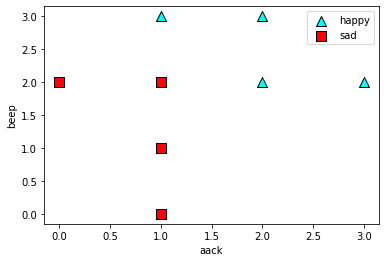

In [4]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [6]:
def sigmoid(x):
    ## TODO ##
    # implement sigmoid function
    output = 1 / (1+ np.exp(-x))

    return output

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using sigmoid and score functions
    output = sigmoid(score(weights, bias, features))

    return output

def log_loss(weights, bias, features, label):
    ## TODO ##
    # implement log_loss calculation using prediction function
    y_predict = prediction(weights, bias, features)
    output = - label * np.log(y_predict) - (1-label) * np.log(1-y_predict)
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [7]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    y_predict = prediction(weights, bias, features)
    weights = weights + learning_rate * (label - y_predict) * features
    bias = bias + learning_rate * (label - y_predict)

    return weights, bias

In [10]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

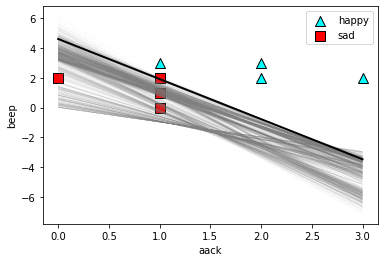

(array([0.88308681, 0.32776666]), -1.5129002532019407)

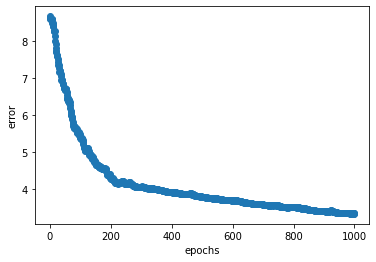

In [11]:
logistic_regression_algorithm(features, labels)

# Logistic SKlearn

In [12]:
from sklearn.linear_model import LogisticRegression
## TODO ##
# Use SKlearn to train logistic regression
clf = LogisticRegression(random_state=0).fit(features, labels)

In [13]:
clf.score(features, labels)

1.0

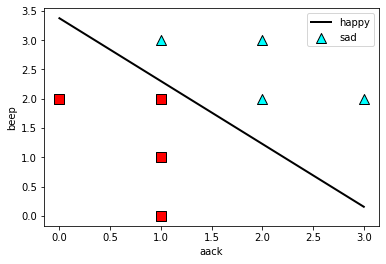

In [14]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()

In [17]:
print(clf.predict(features))
labels

[0 0 0 0 1 1 1 1]


array([0, 0, 0, 0, 1, 1, 1, 1])

In [19]:
print(features)
clf.predict_proba(features)

[[1 0]
 [0 2]
 [1 1]
 [1 2]
 [1 3]
 [2 2]
 [3 2]
 [2 3]]


array([[0.8961831 , 0.1038169 ],
       [0.78342414, 0.21657586],
       [0.77177021, 0.22822979],
       [0.56982858, 0.43017142],
       [0.34163192, 0.65836808],
       [0.32663818, 0.67336182],
       [0.15084214, 0.84915786],
       [0.15967989, 0.84032011]])

In [31]:
weights

array([[1.00458154, 0.93718206]])

In [33]:
sigmoid(score(weights[0], bias, features[2]))

array([0.22822979])

In [35]:
0.8961831+0.1038169

1.0